# 유튜브 랭킹 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [36]:
# 한글 폰트 사용을 위한 설정
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [49]:
df = pd.read_csv('유튜브_순위.csv')
df.head()

,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,756,810,000",655
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,580"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,912,330,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [50]:
# 구독자수(문자열) --> 구독자수2(정수)
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))     # apply는 어떤 함수를 시행하겠다는 의미
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371,64100000
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,756,810,000",655,60400000
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,580",56500000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,912,330,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [51]:
def str2int(x):
    return int(x.replace(',',''))

In [52]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
0,음악/댄스/가수,BLACKPINK,"64,100,000","19,018,090,000",371,64100000,371
1,음악/댄스/가수,HYBE LABELS,"60,400,000","18,756,810,000",655,60400000,655
2,음악/댄스/가수,BANGTANTV,"56,500,000","12,212,970,000","1,580",56500000,1580
3,음악/댄스/가수,SMTOWN,"28,500,000","21,912,330,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


In [53]:
df.sort_values(by='비디오수2', ascending=False).head(10)

,카테고리,채널명,구독자수,조회수,비디오수,구독자수2,비디오수2
154,뉴스/정치/사회,YTN news,"2,500,000","5,472,290,000","553,828",2500000,553828
706,뉴스/정치/사회,연합뉴스TV,"700,000","921,360,000","362,917",700000,362917
60,TV/방송,SBS Drama,"5,490,000","5,757,750,000","340,880",5490000,340880
56,TV/방송,SBS Entertainment,"5,730,000","6,677,740,000","216,786",5730000,216786
337,뉴스/정치/사회,KBS News,"1,320,000","1,848,670,000","176,412",1320000,176412
968,뉴스/정치/사회,Arirang News,"530,000","237,800,000","123,984",530000,123984
244,뉴스/정치/사회,JTBC News,"1,710,000","2,409,660,000","116,553",1710000,116553
287,뉴스/정치/사회,MBCNEWS,"1,510,000","3,402,340,000","115,638",1510000,115638
112,TV/방송,KBS Drama,"3,470,000","4,266,300,000","114,166",3470000,114166
230,뉴스/정치/사회,SBS 뉴스,"1,780,000","2,684,970,000","111,502",1780000,111502


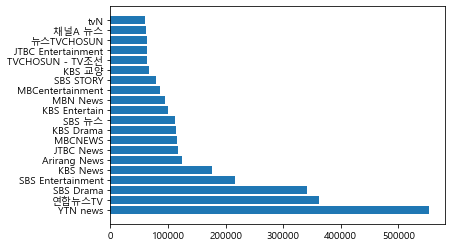

In [54]:
df2 = df.sort_values(by='비디오수2', ascending=False).head(20)

plt.barh(df2['채널명'], df2['비디오수2'])
plt.show()

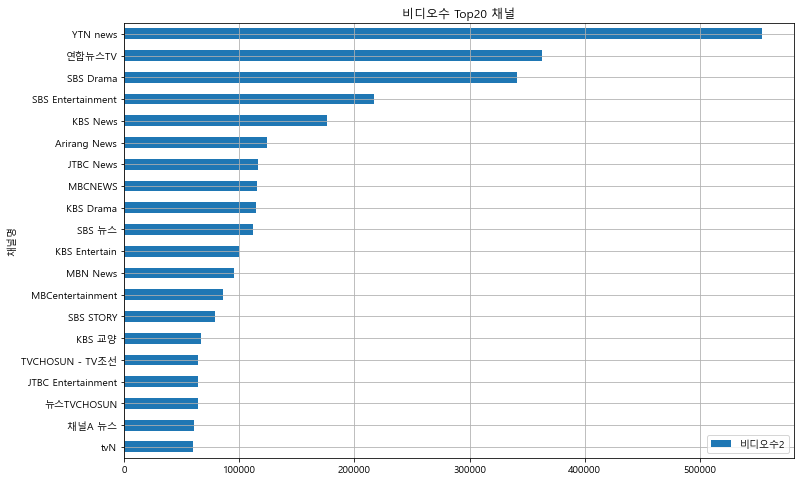

In [55]:
df2 = df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 Top20 채널')
plt.show()